<a href="https://colab.research.google.com/github/dwhew/Bitou-bush/blob/main/Bitou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas
!pip install contextily

In [34]:
import geopandas as gpd
import pandas as pd
from shapely import wkt
import contextily as ctx

In [73]:
#strangly Geopandas could not read the csv so I used pandas 
s = pd.read_csv(r'https://raw.githubusercontent.com/dwhew/Bitou-bush/main/bitou.csv', index_col='FID') 
#geopandas also cannot read the geomery properly, so I had to convert it manually to a GeoSeries

s['geometry'] = s['geometry'].apply(wkt.loads)
#and then converted to geopandas
df = gpd.GeoDataFrame(s)
df

,geometry,Activity,ActivityDa,ComName,MonYr,FinYr,Detection1,Date_S
FID,,,,,,,,
0,POINT Z (153.13481 -26.71795 0.00000),Infestation,1/03/2015,Bitou bush,2015-03,2014 - 2015,<Null>,Jan15_Jun15
1,POINT Z (153.43067 -27.31563 0.00000),Infestation,25/03/2015,Bitou bush,2015-03,2014 - 2015,<Null>,Jan15_Jun15
2,POINT Z (153.42508 -27.30358 0.00000),Infestation,25/03/2015,Bitou bush,2015-03,2014 - 2015,<Null>,Jan15_Jun15
3,POINT Z (153.11057 -25.56516 0.00000),Infestation,1/05/2015,Bitou bush,2015-05,2014 - 2015,<Null>,Jan15_Jun15
4,POINT Z (153.08553 -25.76300 0.00000),Infestation,29/04/2015,Bitou bush,2015-04,2014 - 2015,<Null>,Jan15_Jun15
...,...,...,...,...,...,...,...,...
2455,POINT Z (153.43967 -27.76958 0.00000),Survey,8/07/2020,Bitou bush,NaN,2019 - 2020,8/07/2020,Jan20 - Jun20
2456,POINT Z (153.43592 -27.78790 0.00000),Survey,8/07/2020,Bitou bush,NaN,2019 - 2020,8/07/2020,Jan20 - Jun20
2457,POINT Z (153.43988 -27.77067 0.00000),Survey,8/07/2020,Bitou bush,NaN,2019 - 2020,8/07/2020,Jan20 - Jun20


In [74]:
#this function converts the geometry column from 3d to 2d. to be able to use folium for interactive mapping
#https://github.com/Toblerity/Shapely/issues/709

def _to_2d(x, y, z):
    return tuple(filter(None, [x, y]))

new_geom = []

for geom in s['geometry']:
  new_geom.append(shapely.ops.transform(_to_2d, geom))

df['geometry'] = new_geom

In [75]:
df

,geometry,Activity,ActivityDa,ComName,MonYr,FinYr,Detection1,Date_S
FID,,,,,,,,
0,POINT (153.13481 -26.71795),Infestation,1/03/2015,Bitou bush,2015-03,2014 - 2015,<Null>,Jan15_Jun15
1,POINT (153.43067 -27.31563),Infestation,25/03/2015,Bitou bush,2015-03,2014 - 2015,<Null>,Jan15_Jun15
2,POINT (153.42508 -27.30358),Infestation,25/03/2015,Bitou bush,2015-03,2014 - 2015,<Null>,Jan15_Jun15
3,POINT (153.11057 -25.56516),Infestation,1/05/2015,Bitou bush,2015-05,2014 - 2015,<Null>,Jan15_Jun15
4,POINT (153.08553 -25.76300),Infestation,29/04/2015,Bitou bush,2015-04,2014 - 2015,<Null>,Jan15_Jun15
...,...,...,...,...,...,...,...,...
2455,POINT (153.43967 -27.76958),Survey,8/07/2020,Bitou bush,NaN,2019 - 2020,8/07/2020,Jan20 - Jun20
2456,POINT (153.43592 -27.78790),Survey,8/07/2020,Bitou bush,NaN,2019 - 2020,8/07/2020,Jan20 - Jun20
2457,POINT (153.43988 -27.77067),Survey,8/07/2020,Bitou bush,NaN,2019 - 2020,8/07/2020,Jan20 - Jun20


In [76]:
type(df['geometry'])

geopandas.geoseries.GeoSeries

In [77]:
df['Activity'].unique()

#this is interessting, this might make it hard to work out what bushes are present at one time and which entries are the same bush 


array(['Infestation', 'Treatment', 'InfestTreat', 'Survey'], dtype=object)

In [78]:
print(df['geometry'][0])

POINT (153.134807 -26.71795499924155)


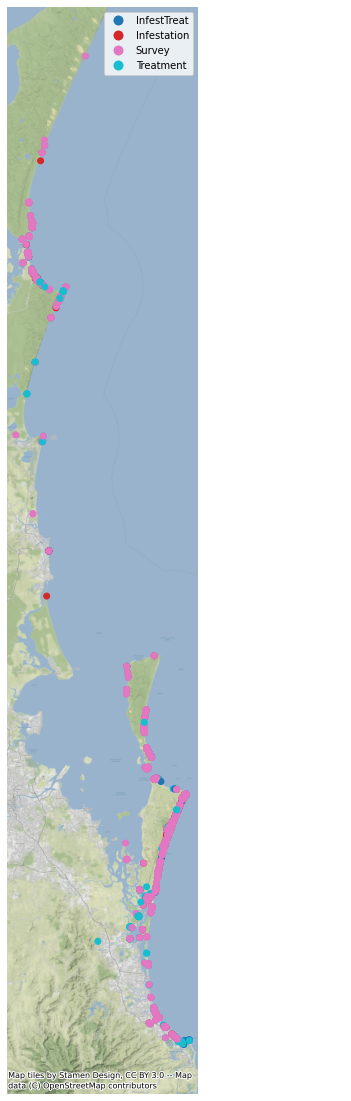

In [79]:
# plot points - colour coded by activity

fig = df.plot(figsize=(20, 20), column='Activity', legend=True)
ctx.add_basemap(fig, zoom=12, crs='EPSG:4326')
fig.set_axis_off()


In [80]:
df['Activity'].value_counts()

Survey         1265
Infestation     514
Treatment       436
InfestTreat     245
Name: Activity, dtype: int64

In [ ]:
514+436+245